# Gillespie Algorithm for Reaction Equations

## Defining Class to solve system
This block of code creates a class that will be used to solve reaction equations using the Gillespie algorithm. I will later on create a separate .py file from which we import this block of code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Gillespie import EvolutionGillespie

## Lotka-Volterra Model
In this block of code we simulate the simple Lotka-Volterra model. 

In [ ]:
number_species = 2
coeff = [1, 0.005, 0.6]  # Reaction rates: birth and death

reactions = np.array([
    # Ingoing
    [[1, 0], [1, 1], [0, 1]],  
    # Outgoing
    [[2, 0], [0, 2], [0, 0]]
])

title = "Simple Birth-Death Process"

# Create the system
LotkaVolterra = EvolutionGillespie(number_species, coeff, reactions, title)

In [ ]:
# Example: Simple Lotka-Volterra
number_species = 2
coeff = [1, 0.005, 0.6]  # Reaction rates: birth and death

reactions = np.array([
    # Ingoing
    [[1, 0], [1, 1], [0, 1]],  
    # Outgoing
    [[2, 0], [0, 2], [0, 0]]
])

title = "Simple Birth-Death Process"

# Create the system
LotkaVolterra = EvolutionGillespie(number_species, coeff, reactions, title)

# Simulate
initial_state = [100, 20]  # Start with 10 individuals of species 0
t_max = 400
times, populations = LotkaVolterra.simulate(initial_state, t_max)




In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
populations = np.array(populations)
ax.plot(times, populations[:, 0], color='blue', label='Prey')
ax.plot(times, populations[:, 1], color='orange', label='Predator')
ax.grid()
ax.legend()
ax.set_title('Lotka-Volterra Model', fontsize=18)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
fig.savefig('Plots/ex15_LotkaVolterra_evolution.png', dpi=300)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(populations[:,0], populations[:, 1], color='red', alpha=0.5, label='Population evolution')
ax.scatter(populations[0, 0], populations[0, 1], s=100, color='black', label='Starting point')
ax.scatter(populations[-1, 0], populations[-1, 1], s=100, color='gray', label='End point')
ax.set_xlabel(r'Population $Y_1$, prey', fontsize=14)
ax.set_ylabel(r'Population $Y_2$, predator', fontsize=14)
ax.set_title('Population Evolution Lotka-Volterra Model', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/ex15_Lotka_volterra_each_other', dpi=300)

In [ ]:
def count_oscillations(times, populations):
    """
    Count the number of oscillations for both prey and predator populations.
    
    An oscillation is defined as a crossing of the population over its mean value.
    
    Parameters:
    - times (list): List of time points from the simulation.
    - populations (list of lists): Populations of each species at each time point.

    Returns:
    - prey_oscillations (int): Number of oscillations for the prey population.
    - predator_oscillations (int): Number of oscillations for the predator population.
    """
    populations = np.array(populations)
    
    # Separate prey and predator populations
    prey_population = populations[:, 0]
    predator_population = populations[:, 1]
    
    # Calculate mean populations
    prey_mean = np.mean(prey_population)
    predator_mean = np.mean(predator_population)
    
    # Find zero crossings (oscillations) for prey
    prey_crossings = np.diff(prey_population > prey_mean).nonzero()[0]
    prey_oscillations = len(prey_crossings)
    
    # Find zero crossings (oscillations) for predator
    predator_crossings = np.diff(predator_population > predator_mean).nonzero()[0]
    predator_oscillations = len(predator_crossings)
    
    return prey_oscillations, predator_oscillations


In [ ]:
# Count oscillations
populations = np.array(populations)
prey_oscillations, predator_oscillations = count_oscillations(times, populations)

print(f"Prey oscillations: {prey_oscillations}")
print(f"Predator oscillations: {predator_oscillations}")


In [ ]:
# get mean number
oscillations_prey = np.zeros(20)
oscillations_predator = np.zeros(20)
for k in range(20):
    initial_state = [100, 20]  # Start with 10 individuals of species 0
    t_max = 400
    times, populations = LotkaVolterra.simulate(initial_state, t_max)
    populations = np.array(populations)
    prey_oscillations, predator_oscillations = count_oscillations(times, populations)
    print(f"Prey oscillations: {prey_oscillations}")
    print(f"Predator oscillations: {predator_oscillations}")
    oscillations_prey[k] = prey_oscillations
    oscillations_predator[k] = predator_oscillations

In [ ]:
# get mean
mean_prey = np.mean(oscillations_prey)
mean_predator = np.mean(oscillations_predator)

In [ ]:
print(mean_prey/2)
print(mean_predator/2)

In [ ]:
def calculate_extinction_time(times, populations):
    """
    Calculate the extinction time, defined as the time at which one of the populations becomes zero.
    
    Parameters:
    - times (list): List of time points from the simulation.
    - populations (list of lists): Populations of each species at each time point.
    
    Returns:
    - extinction_time (float): Time at which one population goes extinct. Returns None if no extinction occurs.
    """
    populations = np.array(populations)
    
    # Iterate through the populations to find when any species reaches zero
    for i, pop in enumerate(populations):
        if np.any(pop <= 0):  # Check if any population is zero or negative
            return times[i]  # Return the corresponding time
    
    return None  # No extinction occurred within the simulation time

# Example usage
extinction_time = calculate_extinction_time(times, populations)
if extinction_time is not None:
    print(f"Extinction occurred at time: {extinction_time:.2f}")
else:
    print("No extinction occurred during the simulation.")


In [ ]:
def extinction_time_distribution(system, initial_state, t_max, n_runs):
    """
    Simulate the system multiple times to determine the distribution of extinction times.
    
    Parameters:
    - system (EvolutionGillespie): The system object to simulate.
    - initial_state (list): Initial populations of the species.
    - t_max (float): Maximum simulation time.
    - n_runs (int): Number of simulations to run.
    
    Returns:
    - extinction_times (list): List of extinction times for each run. If no extinction occurs, time is set to t_max.
    """
    extinction_times = []
    
    for k in range(n_runs):
        # Run the simulation
        times, populations = system.simulate(initial_state, t_max)
        # Calculate extinction time
        extinction_time = calculate_extinction_time(times, populations)
        # If no extinction, set the time to t_max
        extinction_times.append(extinction_time if extinction_time is not None else t_max)
    
    return extinction_times

def plot_extinction_time_histogram(extinction_times, t_max, bins=20):
    """
    Plot a histogram of extinction times.
    
    Parameters:
    - extinction_times (list): List of extinction times.
    - t_max (float): Maximum simulation time.
    - bins (int): Number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(extinction_times, bins=bins, range=(0, t_max), color='skyblue', edgecolor='black', density=True)
    plt.xlabel("Extinction Time")
    plt.ylabel("Frequency")
    plt.title("Distribution of Extinction Times")
    plt.grid(True)
    plt.show()

# Run the simulation for a distribution of extinction times
n_runs = 50  # Number of simulations
t_max = 400  # Maximum simulation time
extinction_times = extinction_time_distribution(LotkaVolterra, initial_state, t_max, n_runs)

# Plot the histogram of extinction times
plot_extinction_time_histogram(extinction_times, t_max)


In [ ]:
def plot_extinction_time_histogram(extinction_times, t_max, bins=20):
    """
    Plot a histogram of extinction times.
    
    Parameters:
    - extinction_times (list): List of extinction times.
    - t_max (float): Maximum simulation time.
    - bins (int): Number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(extinction_times, bins=bins, range=(0, t_max), color='skyblue', edgecolor='black', density=True)
    plt.xlabel("Extinction Time")
    plt.ylabel("Frequency")
    plt.title("Distribution of Extinction Times")
    plt.grid(True)
    plt.savefig('Plots/ex15_hist_extinction.png', dpi=300)
    plt.show()
plot_extinction_time_histogram(extinction_times, t_max)

## Brusselator Model
This code is concerned with evolving the brusselator problem, containing 4 reaction equations.

In [3]:
# Brusselator model
number_species = 2
coeff = [5*10**3, 50, 5*10**(-5), 5] 

reactions = np.array([
    [[0, 0], [1, 0], [2, 1], [1, 0]],  
    [[1, 0], [0, 1], [3, 0], [0, 0]]
])
title = "Brusselator model"

# Create the system
brusselator = EvolutionGillespie(number_species, coeff, reactions, title)

In [ ]:
# Simulate
initial_state = [1000, 2000]  
t_max = 10
times, populations = brusselator.simulate(initial_state, t_max)

In [ ]:
# Plot the evolution of species 0 and 1
fig, ax = brusselator.plot_species(times, populations, 0, 1)
fig.savefig('Plots/ex16_Brusselator_behaviour.png', dpi=300)
plt.show()

In [ ]:
fig, ax = brusselator.plot_species_against_each_other(populations, 0, 1)
fig.savefig('Plots/ex16_brusselator_each_other.png', dpi=300)

In [ ]:
initial_state = [1000, 2000]  
t_max = 10

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    times, populations = brusselator.simulate(initial_state, t_max)
    populations = np.array(populations)
    ax.plot(populations[:,0], populations[:,1], color='red', alpha=0.5, label='Sampling '+str(i+1))
ax.scatter(populations[0, 0], populations[0, 1], s=100, color='black', label='Starting point')
#ax.scatter(populations[-1, 0], populations[-1, 1], s=100, color='gray', label='End point')
ax.set_xlabel(r'Population $Y_1$', fontsize=14)
ax.set_ylabel(r'Population $Y_2$', fontsize=14)
ax.set_title('Population Evolution Brusselator Model', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/ex16_brusselator_a', dpi=300)

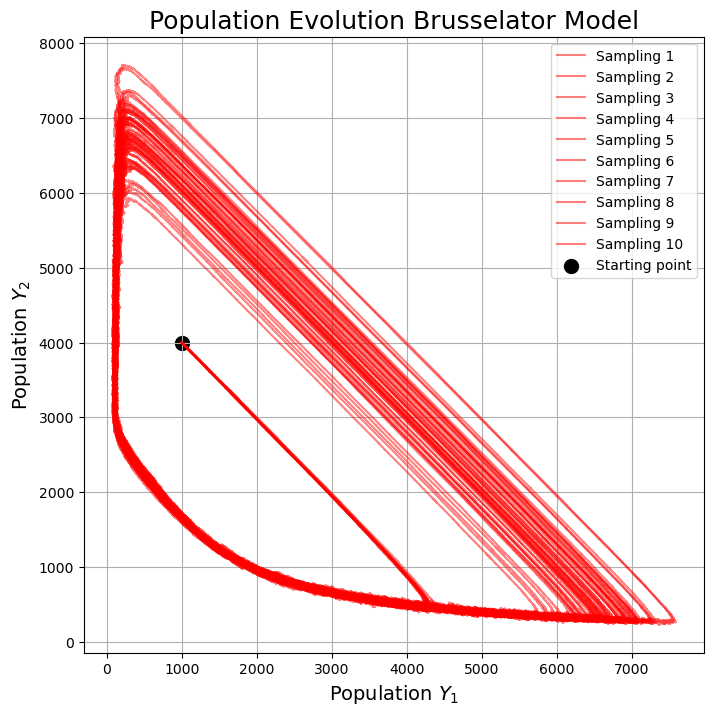

In [4]:
initial_state = [1000, 4000]  
t_max = 10

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    times, populations = brusselator.simulate(initial_state, t_max)
    populations = np.array(populations)
    ax.plot(populations[:,0], populations[:,1], color='red', alpha=0.5, label='Sampling '+str(i+1))
ax.scatter(populations[0, 0], populations[0, 1], s=100, color='black', label='Starting point')
#ax.scatter(populations[-1, 0], populations[-1, 1], s=100, color='gray', label='End point')
ax.set_xlabel(r'Population $Y_1$', fontsize=14)
ax.set_ylabel(r'Population $Y_2$', fontsize=14)
ax.set_title('Population Evolution Brusselator Model', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/ex16_brusselator_ba_longer', dpi=300)

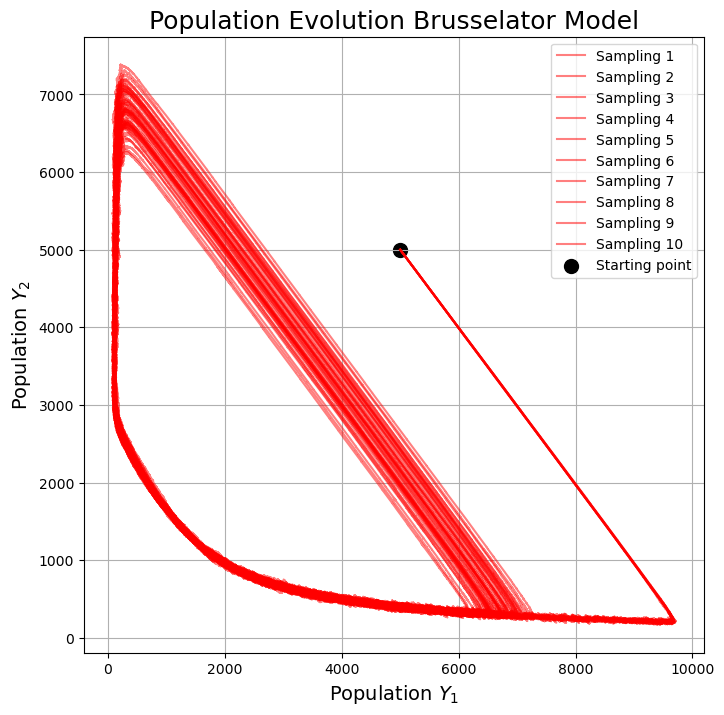

In [5]:
initial_state = [5000, 5000]  
t_max = 10

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    times, populations = brusselator.simulate(initial_state, t_max)
    populations = np.array(populations)
    ax.plot(populations[:,0], populations[:,1], color='red', alpha=0.5, label='Sampling '+str(i+1))
ax.scatter(populations[0, 0], populations[0, 1], s=100, color='black', label='Starting point')
#ax.scatter(populations[-1, 0], populations[-1, 1], s=100, color='gray', label='End point')
ax.set_xlabel(r'Population $Y_1$', fontsize=14)
ax.set_ylabel(r'Population $Y_2$', fontsize=14)
ax.set_title('Population Evolution Brusselator Model', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/ex16_brusselator_bb_longer', dpi=300)

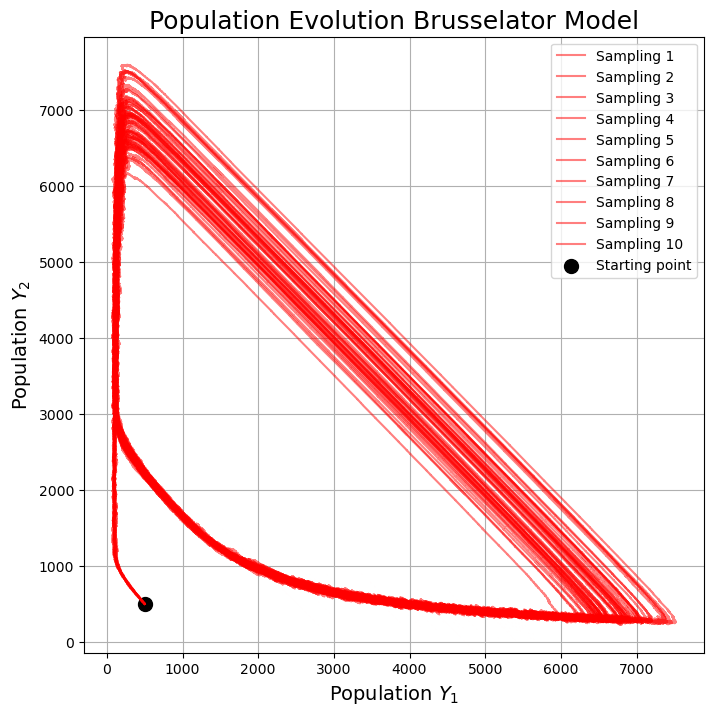

In [6]:
initial_state = [500, 500]  
t_max = 10

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    times, populations = brusselator.simulate(initial_state, t_max)
    populations = np.array(populations)
    ax.plot(populations[:,0], populations[:,1], color='red', alpha=0.5, label='Sampling '+str(i+1))
ax.scatter(populations[0, 0], populations[0, 1], s=100, color='black', label='Starting point')
#ax.scatter(populations[-1, 0], populations[-1, 1], s=100, color='gray', label='End point')
ax.set_xlabel(r'Population $Y_1$', fontsize=14)
ax.set_ylabel(r'Population $Y_2$', fontsize=14)
ax.set_title('Population Evolution Brusselator Model', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/ex16_brusselator_bc_longer', dpi=300)

## Birth-Annihilation Process
This block of code is concerned with the birth annihilation model of exercise 4.14


In [ ]:
# Birth - Annihilation model
number_species = 1
coeff = [1, 0.2] 

reactions = np.array([
    [[1], [1]],  
    [[0], [2]]
])
title = "Birth-Annihilation model"

# Create the system
BirthAnnihilation = EvolutionGillespie(number_species, coeff, reactions, title)

In [ ]:
# Simulate
initial_state = [100]  
t_max = 10
for i in range(10):
    times, populations = BirthAnnihilation.simulate(initial_state, t_max)

In [ ]:
# Plot behaviour

initial_state = [10000]  
t_max = 15

fig, ax = plt.subplots(1,1, figsize=(8,6))
for i in range(10):
    times, populations = BirthAnnihilation.simulate(initial_state, t_max)
    ax.plot(times, populations, color='blue', alpha=0.5, label='Sample '+str(i+1))
time = np.linspace(0, 10, 1000)
mu = coeff[1]
lambd = coeff[0]
exp = 10000*np.exp((mu-lambd)*time)
ax.plot(time, exp, color='red', linewidth=1.5, label='Average behaviour')
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('Population', fontsize=13)
ax.set_title(title, fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/BirthAnnihilation_samples_10000.png', dpi=250)

In [ ]:
# annihilation times

annihilation_times = []
for i in range(1000):
    times, populations = BirthAnnihilation.simulate(initial_state, 20)
    k = 0
    while populations[k] != [0]:
        k += 1
    annihilation_times.append(times[k])

In [ ]:
plt.hist(annihilation_times, density=True, label='Annihilation Time')
plt.xlabel('Annihilation Time', fontsize=13)
plt.ylabel('Normalized counts', fontsize=13)
plt.title('Histogram of Annihilation Times', fontsize=18)
plt.legend()
plt.savefig('Plots/ex14_histogram', dpi=300)